<a href="https://colab.research.google.com/github/34maksuda/Pytorch-Tutorial-Youtube/blob/main/Simple_Neural_Network_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import pandas as pd

In [3]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

In [4]:
data = pd.read_csv(url)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
data['species'] = data['species'].replace('setosa', 0)
data['species'] = data['species'].replace('versicolor', 1)
data['species'] = data['species'].replace('virginica', 2)

<ipython-input-5-0ca2bbd6d8a9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['species'] = data['species'].replace('virginica', 2)


In [7]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train = data.drop('species', axis = 1)
y_train = data['species']

In [10]:
x_train.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
y_train.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [13]:
x_train = torch.FloatTensor(x_train.values)
x_test = torch.FloatTensor(x_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [14]:
x_train

tensor([[4.6000, 3.6000, 1.0000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.1000, 3.5000, 1.4000, 0

In [15]:
x_test

tensor([[6.1000, 2.8000, 4.7000, 1.2000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [6.5000, 3.2000, 5.1000, 2.0000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [6.4000, 2.8000, 5.6000, 2

In [45]:
#Create a simple neural network
class my_model(nn.Module):
  def __init__(self, input = 4, h1=8, h2=9, output = 3):
    super().__init__()
    self.fc1 = nn.Linear(input, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.output=nn.Linear(h2, output)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x = self.output(x)

    return x


In [46]:
#torch.manual_seed(42)
model = my_model()


In [47]:
model.parameters

<bound method Module.parameters of my_model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)>

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [53]:
epoch = 100
losses = []

for i in range(epoch):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 0.06436483561992645
Epoch: 10 Loss: 0.06153516843914986
Epoch: 20 Loss: 0.05974333733320236
Epoch: 30 Loss: 0.05847800895571709
Epoch: 40 Loss: 0.05751160532236099
Epoch: 50 Loss: 0.056730691343545914
Epoch: 60 Loss: 0.05607355386018753
Epoch: 70 Loss: 0.055503424257040024
Epoch: 80 Loss: 0.05499688535928726
Epoch: 90 Loss: 0.05453847348690033


In [57]:
import matplotlib.pyplot as plt
# %matplotlib inline

Text(0, 0.5, 'losses')

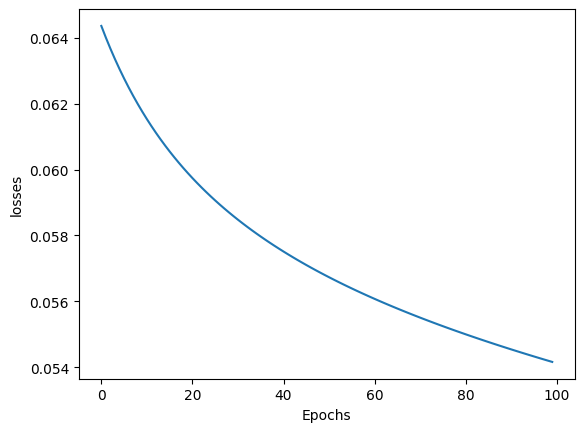

In [58]:
plt.plot(range(epoch), losses)
plt.xlabel('Epochs')
plt.ylabel('losses')

In [66]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_eval = model.forward(data)
    print(f'{i+1}.) {str(y_eval)} \t {y_test[i]} \t {y_eval.argmax().item()}')
    #print(f'{i+1}. {str(y_eval)} \t {y_eval.argmax().item()} \t {y_test[i]}')

    if(y_eval.argmax().item() == y_test[i]):
      correct += 1
print(f'we got {correct} correct result')

1.) tensor([-1.4486,  8.2863,  2.5929]) 	 1 	 1
2.) tensor([10.7691,  3.3258, -9.8749]) 	 0 	 0
3.) tensor([-15.3114,   0.7402,  17.7595]) 	 2 	 2
4.) tensor([-2.0504,  7.5604,  3.2402]) 	 1 	 1
5.) tensor([-1.9362,  8.5948,  3.1608]) 	 1 	 1
6.) tensor([ 9.9785,  3.1784, -9.1085]) 	 0 	 0
7.) tensor([ 1.4292,  7.8860, -0.4798]) 	 1 	 1
8.) tensor([-7.0445,  4.9640,  8.7229]) 	 2 	 2
9.) tensor([-4.0770,  6.1215,  5.4401]) 	 1 	 1
10.) tensor([0.7918, 8.4674, 0.1760]) 	 1 	 1
11.) tensor([-5.6590,  5.7059,  7.1988]) 	 2 	 2
12.) tensor([ 9.7001,  2.6642, -8.8637]) 	 0 	 0
13.) tensor([10.7252,  3.0227, -9.8483]) 	 0 	 0
14.) tensor([ 9.8745,  2.7252, -9.0312]) 	 0 	 0
15.) tensor([10.3830,  2.9031, -9.5196]) 	 0 	 0
16.) tensor([-1.6902,  8.2899,  2.8741]) 	 1 	 1
17.) tensor([-10.4586,   2.5577,  12.4174]) 	 2 	 2
18.) tensor([0.5563, 8.3464, 0.4001]) 	 1 	 1
19.) tensor([-1.7304,  7.5482,  2.8750]) 	 1 	 1
20.) tensor([-10.4057,   2.3310,  12.3487]) 	 2 	 2
21.) tensor([ 9.3826,  2.8